In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Paths based on your folder structure
RAW_DATA_PATH = "../data/raw/"
PROCESSED_DATA_PATH = "../data/processed/"
CHARTS_PATH = "../reports/charts/"


In [27]:
df = pd.read_csv("/content/ipl_raw_data.csv")
df.head()

,player_name,team,role,batting_style,bowling_style,nationality,age,base_price,sold_price,matches_played,batting_strike_rate,batting_average,wickets,economy_rate,is_international,season
0,Virat Kohli,RR,Batsman,Right-hand bat,NaN,India,36,4000000,8897491,200,153.69,20.87,75,7.18,0,2022
1,Rohit Sharma,PBKS,Bowler,Left-hand bat,Right-arm fast,India,36,3000000,4935479,133,131.48,45.86,116,6.72,0,2022
2,KL Rahul,GT,Wicketkeeper,Left-hand bat,NaN,India,31,5000000,8199031,196,100.98,40.97,80,6.03,0,2021
3,Shubman Gill,CSK,Bowler,Left-hand bat,NaN,India,29,10000000,128812558,127,116.98,24.28,60,7.44,0,2022
4,Suryakumar Yadav,SRH,Bowler,Right-hand bat,Right-arm spin,India,23,5000000,17162615,150,176.36,54.09,128,6.35,0,2022


In [28]:
df_clean = df.copy()

# Remove duplicates
df_clean.drop_duplicates(inplace=True)

# Fill missing values
df_clean.fillna(0, inplace=True)

# Standardize column names
df_clean.columns = df_clean.columns.str.lower().str.replace(" ", "_")

df_clean.head()


,player_name,team,role,batting_style,bowling_style,nationality,age,base_price,sold_price,matches_played,batting_strike_rate,batting_average,wickets,economy_rate,is_international,season
0,Virat Kohli,RR,Batsman,Right-hand bat,0,India,36,4000000,8897491,200,153.69,20.87,75,7.18,0,2022
1,Rohit Sharma,PBKS,Bowler,Left-hand bat,Right-arm fast,India,36,3000000,4935479,133,131.48,45.86,116,6.72,0,2022
2,KL Rahul,GT,Wicketkeeper,Left-hand bat,0,India,31,5000000,8199031,196,100.98,40.97,80,6.03,0,2021
3,Shubman Gill,CSK,Bowler,Left-hand bat,0,India,29,10000000,128812558,127,116.98,24.28,60,7.44,0,2022
4,Suryakumar Yadav,SRH,Bowler,Right-hand bat,Right-arm spin,India,23,5000000,17162615,150,176.36,54.09,128,6.35,0,2022


In [29]:
import os

os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
processed_file = os.path.join(PROCESSED_DATA_PATH, "ipl.csv")
df_clean.to_csv(processed_file, index=False)

processed_file

'../data/processed/ipl.csv'

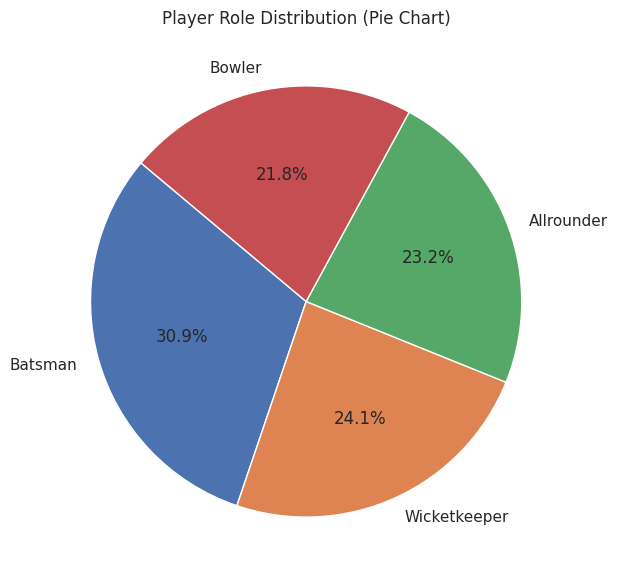

In [30]:
plt.figure(figsize=(7,7))

role_counts = df_clean["role"].value_counts()

plt.pie(role_counts.values, labels=role_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Player Role Distribution (Pie Chart)")

os.makedirs(CHARTS_PATH, exist_ok=True)
plt.savefig(os.path.join(CHARTS_PATH, "chart1_role_pie.png"))
plt.show()

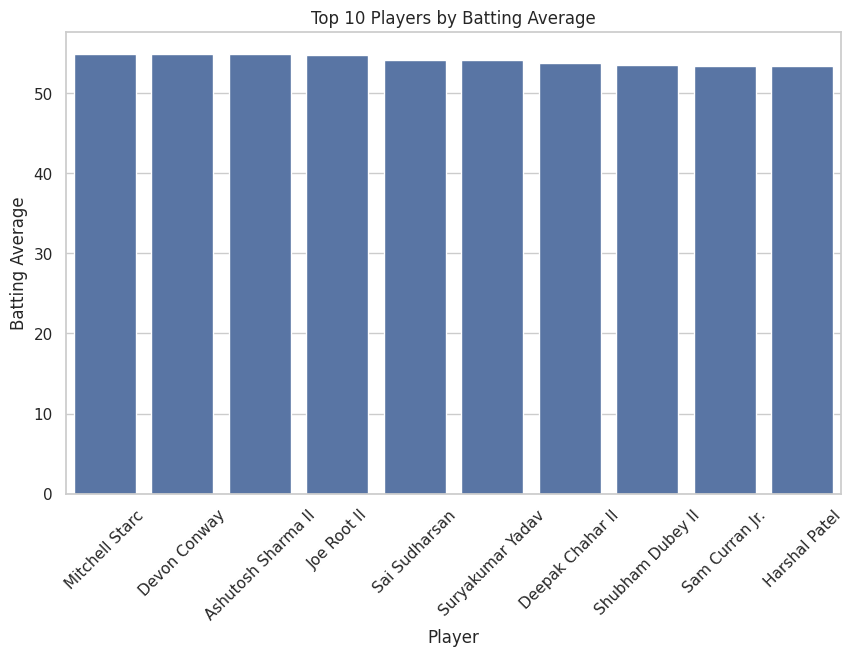

In [31]:
plt.figure(figsize=(10,6))

top_avg = df_clean.sort_values(by="batting_average", ascending=False).head(10)

sns.barplot(x=top_avg["player_name"], y=top_avg["batting_average"])
plt.xticks(rotation=45)
plt.title("Top 10 Players by Batting Average")
plt.xlabel("Player")
plt.ylabel("Batting Average")

plt.savefig(os.path.join(CHARTS_PATH, "chart2_batting_average_bar.png"))
plt.show()



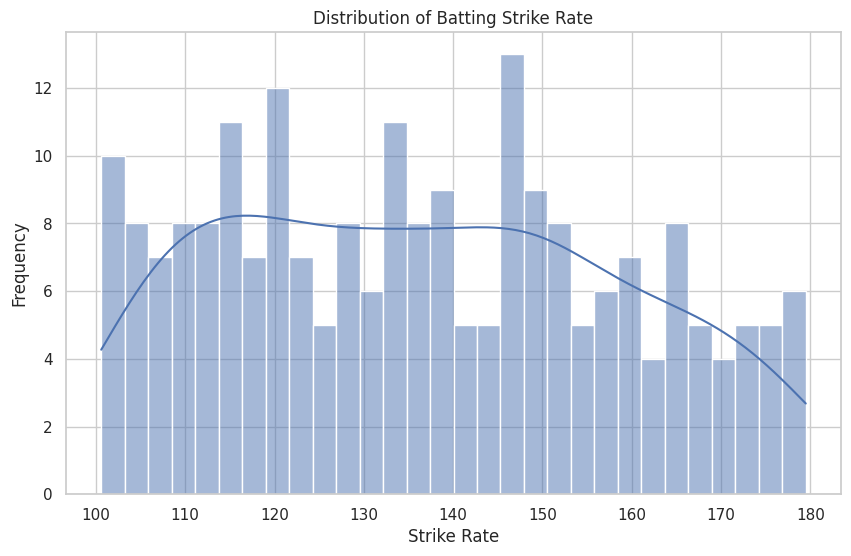

In [32]:
plt.figure(figsize=(10,6))

sns.histplot(df_clean["batting_strike_rate"], bins=30, kde=True)
plt.title("Distribution of Batting Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Frequency")

plt.savefig(os.path.join(CHARTS_PATH, "chart3_strike_rate_hist.png"))
plt.show()


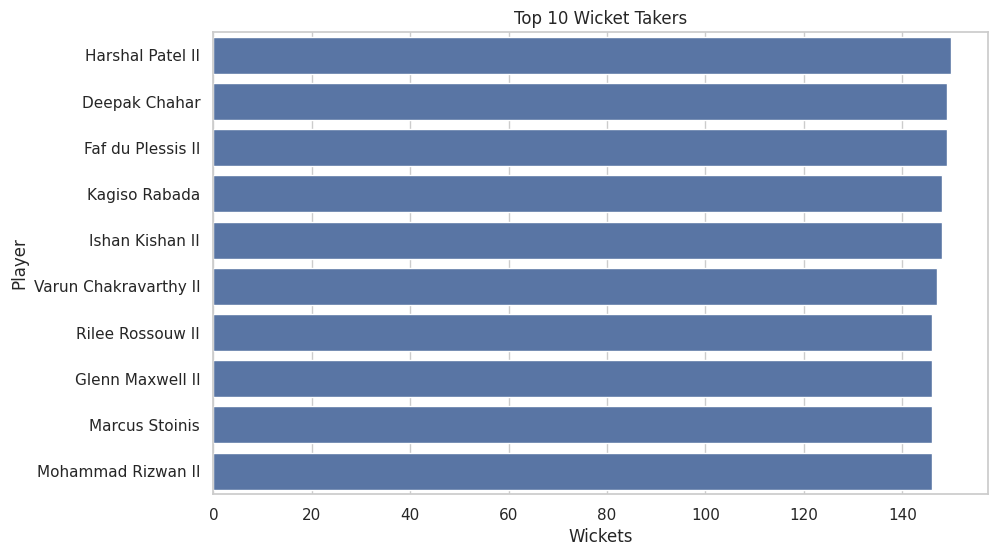

In [33]:
plt.figure(figsize=(10,6))

top_wkts = df_clean.sort_values(by="wickets", ascending=False).head(10)

sns.barplot(y=top_wkts["player_name"], x=top_wkts["wickets"])
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Player")

plt.savefig(os.path.join(CHARTS_PATH, "chart4_top_wickets_hbar.png"))
plt.show()



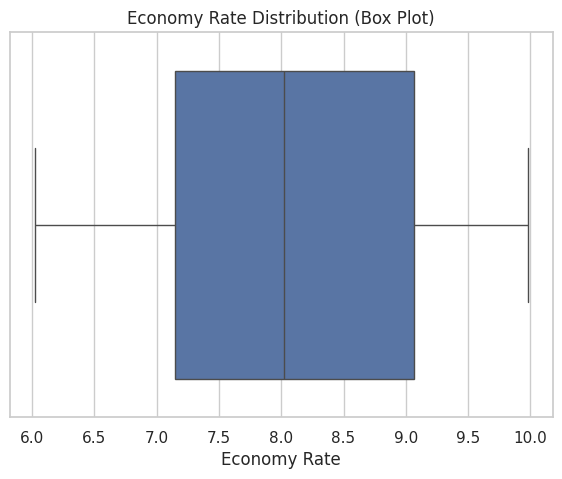

In [34]:
plt.figure(figsize=(7,5))

sns.boxplot(x=df_clean["economy_rate"])
plt.title("Economy Rate Distribution (Box Plot)")
plt.xlabel("Economy Rate")

plt.savefig(os.path.join(CHARTS_PATH, "chart5_economy_boxplot.png"))
plt.show()



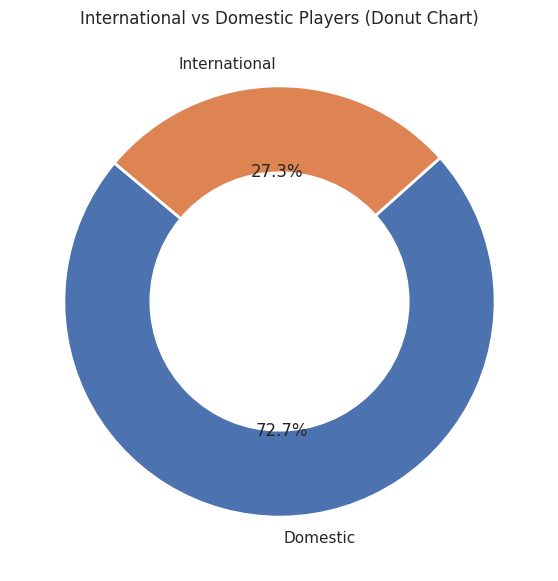

In [35]:
plt.figure(figsize=(7,7))

intl_counts = df_clean["is_international"].value_counts()

plt.pie(intl_counts.values, labels=["Domestic","International"], autopct="%1.1f%%",
        startangle=140, wedgeprops={"linewidth": 2, "edgecolor": "white"})

# Create donut hole
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("International vs Domestic Players (Donut Chart)")

plt.savefig(os.path.join(CHARTS_PATH, "chart6_international_donut.png"))
plt.show()



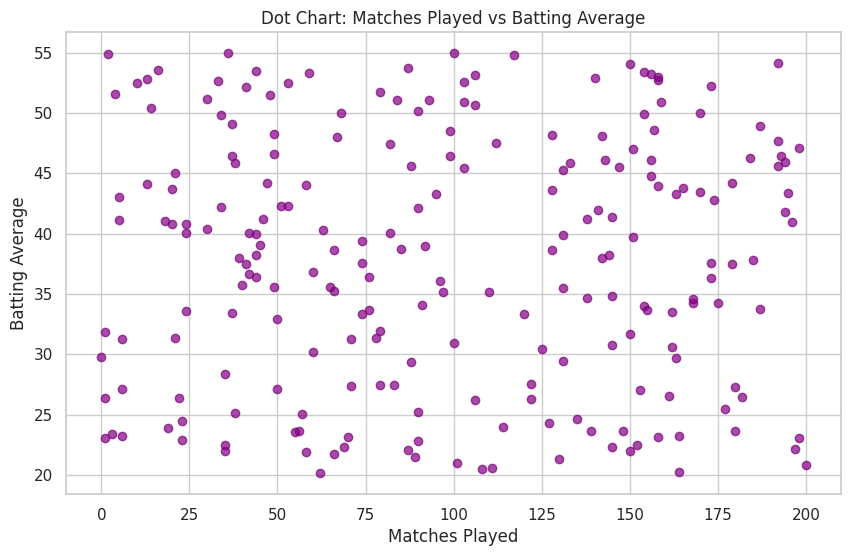

In [36]:
plt.figure(figsize=(10,6))

# Dot chart showing relation between matches played and batting average
plt.scatter(df_clean["matches_played"], df_clean["batting_average"], alpha=0.7, color="purple")

plt.title("Dot Chart: Matches Played vs Batting Average")
plt.xlabel("Matches Played")
plt.ylabel("Batting Average")

# Save chart
chart_path = os.path.join(CHARTS_PATH, "chart7_dot_matches_vs_avg.png")
plt.savefig(chart_path)

plt.show()
